In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("train-00000-of-00001.parquet")

df.head(10)


,label,source,text,id
0,1,Sentiment140,Last study day tomorrow before my last exam ;o...,1021104
1,0,Sentiment140,@luislanz the iphone 2g only supports bt audio...,345503
2,1,Sentiment140,@alejandradd IT IS!!! And YOU live in South ...,35594
3,0,Sentiment140,merlin is a funny show...i have maths exam thi...,1061354
4,1,Sentiment140,"@ConverseSniffer Heyyyy, I'm a....... Twittere...",93408
5,1,Sentiment140,Home from Ikea with the Wife and its curry nig...,1428166
6,0,Sentiment140,has a headache ... and right before evening se...,1420737
7,1,Sentiment140,@Azlen not in my family,53102
8,1,Sentiment140,@renzz hehe you aint the only one up early today,1177719
9,0,Sentiment140,"I hate this unusual Wether, somedays is hot as...",1441181


The Multi-Domain Sentiment Dataset contains product reviews taken from Amazon.com from many product types (domains). Some domains (books and dvds) have hundreds of thousands of reviews. Others (musical instruments) have only a few hundred. Reviews contain star ratings (1 to 5 stars) that can be converted into binary labels if needed. This page contains some descriptions about the data.

The dataset has 4 columns and 1,568,627 rows. 
Label is the sentiment stored as binary values 1 being positive and 0 being negative/neutral 
source is the source of the data. In this case, all entries are from "Sentiment140".
text contains the actual text data that are being analysed for sentiment.
id contains unique identifiers for each entry in the dataset.

In [3]:
# Extract only the relevant columns
df = df[["text", "label"]]

df.head(10)

,text,label
0,Last study day tomorrow before my last exam ;o...,1
1,@luislanz the iphone 2g only supports bt audio...,0
2,@alejandradd IT IS!!! And YOU live in South ...,1
3,merlin is a funny show...i have maths exam thi...,0
4,"@ConverseSniffer Heyyyy, I'm a....... Twittere...",1
5,Home from Ikea with the Wife and its curry nig...,1
6,has a headache ... and right before evening se...,0
7,@Azlen not in my family,1
8,@renzz hehe you aint the only one up early today,1
9,"I hate this unusual Wether, somedays is hot as...",0


Now the data frame only consists of the colums i need which are the text and the binary label

In [4]:
print("Amount of columns: ", df.shape[0])
print(df.isnull().sum())

Amount of columns:  1568627
text     0
label    0
dtype: int64


Checking that there is no null values in the data

In [5]:
X = df['text']
y = df['label'] # 0 neutral/negative, 1 positive


In [6]:

# Vectorise the text data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=30000, sublinear_tf=True)  # Unigrams & bigrams
X_vectors = vectorizer.fit_transform(X)


TfidfVectorizer converts raw text into numbers, which a machine learning model can understand.

ngram_range=(1,3) collect phrases 1 to 3 words long

max_features=20000 collects top 20,000 words

sublinear_tf=true Uses logarithmic scaling for word frequency to prevent very common words (like "the", "is") from overpowering the dataset.

fit_transform(X) converts the text into a numerical matrix.



In [7]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.3, random_state=42)

test_size=0.3 = 70% training data and 30% testing data

random_state=42 = ensures that every time you run the code, you get the same results.

In [8]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Create and train the model

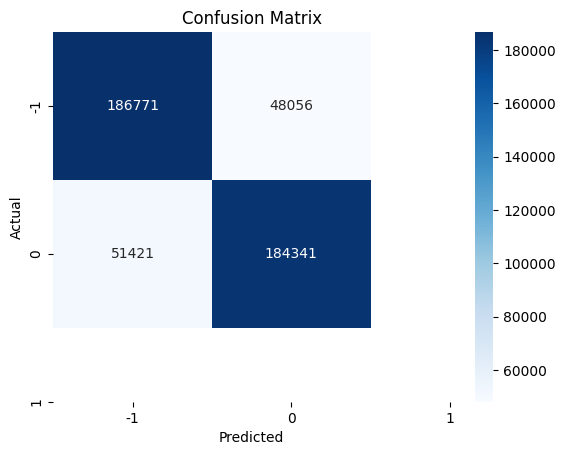

In [9]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Makes predictions and compares actual vs predicted labels using confusion matrix

The model correctly predicted 186,771 negative reviews and 184,341 neutral reviews. (Blue Diagonal)

The model misclassified 48,056 negative reviews as neutral and 51,421 neutral reviews as negative. (White Diagonal)
The errors are not extreme, indicating decent model performance but there is a lot of room for improvement.

In [10]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886117185059575
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79    234827
           1       0.79      0.78      0.79    235762

    accuracy                           0.79    470589
   macro avg       0.79      0.79      0.79    470589
weighted avg       0.79      0.79      0.79    470589



**Accuracy**: 
- Correct predictions / All predictions
- 78.8 is a poor accuracy when it comes to sentiment analysis generally 90+ is needed for high stake applications for example mental health services but could be used on platforms like Twitter or Instagram for brand monitoring.

**Precision**: 
- Proportion of correct predictions for a given class out of all predictions made for that class.
- If the model made a prediction that something was positive, it would be right 79% of the time.
- Similarly, 78% for negative.

**Recall**: 
- Proportion of correct predictions for a class out of all actual samples for that class.
- For Neutral (0):
    - Recall = True Positives (Correct Neutral) / (True Positives + False Negatives)
    - 80% of all actual Neutral reviews were correctly classified.

**F1-Score**: 
- Harmonic mean of Precision and Recall:
    - Neutral (0) F1-Score: 0.79 = Balanced performance for this class.
    - Similarly, Positive (1) F1-Score is also 0.79.

**Support**: 
- Total number of samples for each class in the test set:
    - Neutral (0): 234,827 reviews
    - Positive (1): 235,762 reviews
- The classes are well-balanced, which is ideal for classification tasks.


**Macro Average**:

- Simple average of Precision, Recall, and F1-Score across all classes:
    - Ex. Macro Avg Precision = (Precision(0) + Precision(1)) / 2

- This treats all classes equally, even if they have different sample sizes.

**Weighted Average**:

- Weighted by class support (i.e., the number of samples in each class):
    - Ex. Weighted Avg Precision = (Precision(0) * Support(0) + Precision(1) * Support(1)) / Total Support

- This ensures that the scores reflect the class distribution in the dataset.